# Desafío - Clasificación desde la econometría
- Karen Cortés
- Constanza Córdova
<br><br>
__Descripción__
En esta sesión trabajaremos el dataset south african heart, el cual contiene las siguientes variables:
- sbp : Presión Sanguínea Sistólica.
- tobacco : Promedio tabaco consumido por día.
- ldl : Lipoproteína de baja densidad.
- adiposity : Adiposidad.
- famhist : Antecedentes familiares de enfermedades cardiácas. (Binaria)
- types : Personalidad tipo A
- obesity : Obesidad.
- alcohol : Consumo actual de alcohol.
- age : edad.
- chd : Enfermedad coronaria. (dummy)

## Desafío 1: Preparar el ambiente de trabajo


Cargamos las librerías básica para importación y manipulación de datos, gráficos y modelación econométrica

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

Importamos el dataset south africa

In [2]:
df = pd.read_csv('southafricanheart.csv')

Visualizamos el dataset y eliminamos la columna Jnnamed: 0 para preparar nuestro DataFrame

In [3]:
print(df.head())

   Unnamed: 0  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  \
0           1  160    12.00  5.73      23.11  Present     49    25.30   
1           2  144     0.01  4.41      28.61   Absent     55    28.87   
2           3  118     0.08  3.48      32.28  Present     52    29.14   
3           4  170     7.50  6.41      38.03  Present     51    31.99   
4           5  134    13.60  3.50      27.78  Present     60    25.99   

   alcohol  age  chd  
0    97.20   52    1  
1     2.06   63    1  
2     3.81   46    0  
3    24.26   58    1  
4    57.34   49    1  


In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

Obtenemos las variables:

In [5]:
variables = list(df.columns)
print(f'El set de south african heart porsee las siguientes variables:\n {variables} ')

El set de south african heart porsee las siguientes variables:
 ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd'] 


A continuación, realizamos un análisis descriptivo de las variables 

In [6]:
print(df.describe(include='all'))

               sbp     tobacco         ldl   adiposity famhist       typea  \
count   462.000000  462.000000  462.000000  462.000000     462  462.000000   
unique         NaN         NaN         NaN         NaN       2         NaN   
top            NaN         NaN         NaN         NaN  Absent         NaN   
freq           NaN         NaN         NaN         NaN     270         NaN   
mean    138.326840    3.635649    4.740325   25.406732     NaN   53.103896   
std      20.496317    4.593024    2.070909    7.780699     NaN    9.817534   
min     101.000000    0.000000    0.980000    6.740000     NaN   13.000000   
25%     124.000000    0.052500    3.282500   19.775000     NaN   47.000000   
50%     134.000000    2.000000    4.340000   26.115000     NaN   53.000000   
75%     148.000000    5.500000    5.790000   31.227500     NaN   60.000000   
max     218.000000   31.200000   15.330000   42.490000     NaN   78.000000   

           obesity     alcohol         age         chd  
count 

Observamos que las variables famhist y chd son variables categoricas 

In [7]:
print(df['famhist'].value_counts())

Absent     270
Present    192
Name: famhist, dtype: int64


Se observa que la categoria mayoritaria en famhist, antecedentes familiares de enfermedades cardiacas es Ausencia (Absent), mientras que Presencia (Present) es la clase minoritaria

In [8]:
df['chd'].value_counts()

0    302
1    160
Name: chd, dtype: int64

Se observa que la clase mayoritaria para chd, Enfermedad coronaria, es negativo (valor = 0)

## Desafío 2
1. Recodifique famhist a dummy, asignando 1 a la categoría minoritaria.
2. Utilice smf.logit para estimar el modelo.
3. Implemente una función inverse_logit que realice el mapeo de log-odds a probabilidad.
4. Con el modelo estimado, responda lo siguiente:
    - ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?
    - ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?
    - ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?
    - Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados.
Tip: Utilice β/4

Recodificamos la variable famhist asignando 1 a la categoria minoritaria Present

In [9]:
df['famhist_recod'] = np.where(df['famhist']=='Present', 1, 0)

In [10]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,famhist_recod
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,0
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,1
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,1


Estimamos el modelo de regresión logística 

In [11]:
modelo_logit = smf.logit('chd ~ famhist_recod', df).fit()

modelo_logit.summary()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:                 0.05740
Time:                        20:09:51   Log-Likelihood:                -280.95
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 4.937e-09
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1690      0.143     -8.169      0.000      -1.449      -0.889
famhist_recod     1.1690      0.203      5.751      0.000       0.771       1.567
=================================================================================
"""

Implementamos una función que nos permita obtener la probabilidad del valor estimado de acuerdo al modelo

In [12]:
def inverse_logit(valor, modelo_logit = '', valor_estimado = True):
    """
    inverse_logit: retorna la probabilidad mediante la función logística inversa de un 
    modelo de regresión logística con 1 variable independiente
    
    Parametros:
    valor: cuando valor_estimado es True, aplica directamente la conversión de log-off a probabilidad
            cuando valor_estimado es False, valor toma el valor de la variable independiente a evaluar al modelo
    modelo_logit: modelo de regresión logistica que se utilizará para evaluar la varuable independiente
    
    """
    if valor_estimado == True:
        valor_estimado = valor
        return round(1 / (1 + np.exp(-valor_estimado)),2)
    
    elif valor_estimado == False:
        x = valor
        estimate_y = modelo_logit.params['Intercept'] + (modelo_logit.params['famhist_recod'] * x)
        return round(1 / (1+ np.exp(-estimate_y)),2)


##### ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?

In [13]:
print(f'La probabilidad de que un individuo con antecedentes familiares tenga una enfermedad crónica es {inverse_logit(1, modelo_logit, False)}')

La probabilidad de que un individuo con antecedentes familiares tenga una enfermedad crónica es 0.5


##### ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?

In [14]:
print(f'La probabilidad de que un individuo sin antecedentes familiares tenga una enfermedad crónica es {inverse_logit(0, modelo_logit, False)}')

La probabilidad de que un individuo sin antecedentes familiares tenga una enfermedad crónica es 0.24


##### ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?

In [15]:
diff = inverse_logit(1, modelo_logit, False) - inverse_logit(0, modelo_logit, False)
print(f'La diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes es {diff}')

La diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes es 0.26


##### Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados. Tip: Utilice β/4

In [16]:
modelo_ols = smf.ols('chd ~ famhist_recod', df).fit()

In [18]:
modelo_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           2.66e-09
Time:                        19:01:38   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2370      0.028      8.489      0.000       0.182       0.292
famhist_recod     0.2630      0.043      6.071      0.000       0.178       0.348
==============================================================================
Omnibus:                      768.898   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.778
Skew:                           0.579   Prob(JB):                     1.72e-13
Kurtosis:                       1.692   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Comente las similitudes entre los coeficientes estimados:

In [19]:
1.1690 / 4

0.29225

__R:__ al dividir el coeficiente estimado de la regresion logistica obtenemos un valor de 0.29225 y al compararlo con el coeficiente estimado con OLS cuyo valor es de 0.2630 se puede apreciar que hay una cierta similitud entre ambos, por lo que es una aproximación razonable del coeficiente estimado en el modelo LMP.

## Desafío 3: Estimación completa
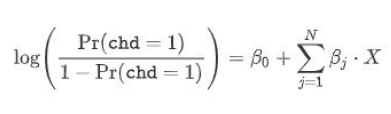
- Depure el modelo manteniendo las variables con significancia estadística al 95%.
- Compare los estadísticos de bondad de ajuste entre ambos.
- Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.

In [59]:
modelo_logit_completo = smf.logit('chd ~ sbp + tobacco + ldl + adiposity + typea + obesity + alcohol + age + famhist_recod', df).fit()

modelo_logit_completo.summary()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Sat, 21 Nov 2020   Pseudo R-squ.:                  0.2080
Time:                        13:54:42   Log-Likelihood:                -236.07
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.055e-22
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.1507      1.308     -4.701      0.000      -8.715      -3.587
sbp               0.0065      0.006      1.135      0.256      -0.005       0.018
tobacco           0.0794      0.027      2.984      0.003       0.027       0.132
ldl               0.1739      0.060      2.915      0.004       0.057       0.291
adiposity         0.0186      0.029      0.635      0.526      -0.039       0.076
typea             0.0396      0.012      3.214      0.001       0.015       0.064
obesity          -0.0629      0.044     -1.422      0.155      -0.150       0.024
alcohol           0.0001      0.004      0.027      0.978      -0.009       0.009
age               0.0452      0.012      3.728      0.000       0.021       0.069
famhist_recod     0.9254      0.228      4.061      0.000       0.479       1.372
=================================================================================
"""

Se eliminan del modelo las siguientes variables:sbp, adiposity, obesity, alcohol.
Se mantienen solo aquellas variables con un 95% de significancia

In [60]:
modelo_logit_depurado = smf.logit('chd ~ tobacco + ldl + typea + age + famhist_recod', df).fit()

modelo_logit_depurado.summary()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      456
Method:                           MLE   Df Model:                            5
Date:                Sat, 21 Nov 2020   Pseudo R-squ.:                  0.2020
Time:                        13:54:44   Log-Likelihood:                -237.84
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 2.554e-24
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.4464      0.921     -7.000      0.000      -8.251      -4.642
tobacco           0.0804      0.026      3.106      0.002       0.030       0.131
ldl               0.1620      0.055      2.947      0.003       0.054       0.270
typea             0.0371      0.012      3.051      0.002       0.013       0.061
age               0.0505      0.010      4.944      0.000       0.030       0.070
famhist_recod     0.9082      0.226      4.023      0.000       0.466       1.351
=================================================================================
"""

##### Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.

__R:__ Si observamos el pseudo R2 = 0.2080 del modelo con todos los regresores y el pseudo R2 = 0.2020 del modelo depurado podemos decir que no se aprecia una mejora significativa. Sin embargo, la ventaja del nuevo modelo es la reducción de variables a considerar para la estimación del log-odds.

## Desafío 4: Estimación de perfiles
A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente transfórmelas a probabilidades con inverse_logit . Los perfiles a estimar son los siguientes:
- La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.
- La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.
- La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

##### probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.

Utilizamos la media de la muestra de cada variable del modelo, las que se pueden observar  en la descripción inicial del data set

In [63]:
estimado1= modelo_logit_depurado.params['Intercept'] + (modelo_logit_depurado.params['tobacco'] * 3.64) + (modelo_logit_depurado.params['ldl'] * 4.74) + (modelo_logit_depurado.params['typea'] * 53.10) + (modelo_logit_depurado.params['age'] * 42.82) + (modelo_logit_depurado.params['famhist_recod'] * 0.42)

In [67]:
print(f'La probabilidad de tener una enfermedad coronaria para un individuo con caracteristicas similares a la muestra es {inverse_logit(estimado1)}') 

La probabilidad de tener una enfermedad coronaria para un individuo con caracteristicas similares a la muestra es 0.29


##### probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad
Se usara el cuartil 3 para ldl (5.79) y la media para el resto de las variables

In [73]:
estimado2= modelo_logit_depurado.params['Intercept'] + (modelo_logit_depurado.params['ldl'] * 5.79) + (modelo_logit_depurado.params['tobacco'] * 3.64) + (modelo_logit_depurado.params['typea'] * 53.10) + (modelo_logit_depurado.params['age'] * 42.82) + (modelo_logit_depurado.params['famhist_recod'] * 0.42)

In [74]:
print(f'La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad es  {inverse_logit(estimado2)}')

La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad es  0.33


##### probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad
Se usara el cuartil 1 para ldl (3.28) y la media para el resto de las variables

In [75]:
estimado3 = modelo_logit_depurado.params['Intercept'] + (modelo_logit_depurado.params['ldl'] * 3.28) + (modelo_logit_depurado.params['tobacco'] * 3.64) + (modelo_logit_depurado.params['typea'] * 53.10) + (modelo_logit_depurado.params['age'] * 42.82) + (modelo_logit_depurado.params['famhist_recod'] * 0.42)

In [77]:
print(f'La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad es  {inverse_logit(estimado3)}')

La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad es  0.25
